# Libraries

The libraries listed below will be used in the execution of this project. Assisting us from data processing to prediction. 

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from unidecode import unidecode
import contractions
import swifter
from textblob import TextBlob

# librosa to process audio files
import librosa as lb
import soundfile as sf
from scipy import signal

# play audio file
from IPython.display import Audio

# import libs for lemmitization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# download lemmitization data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import seaborn as sns

# Library to plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification

# one hot vector the Y values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Libraries for ML
from sklearn.model_selection import train_test_split

# Libraries to be used for the NN section
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, Masking, Dense, Input, MaxPooling1D, Flatten, Concatenate, Activation, Add, LayerNormalization, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Bidirectional, LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# BERT
from transformers import BertTokenizer, TFBertForSequenceClassification

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giliardyminicucci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/giliardyminicucci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/giliardyminicucci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-02-03 17:48:03.416436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import the IEMOCAP dataframe

From the process previously written to extract the information are going to load the dataframe which contains the emotions, transcriptions and other information that will be used in this project

In [2]:
# import IEMOCAP dataset
df = pd.read_csv('Data/IEMOCAP/IEMOCAP_DF.csv')

df.head(10)

,filename,filepath,emotion,transcription,dataset,emotion_label,gender,method,session
0,Ses04M_script02_2_M042,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,xxx,Or not.,IEMOCAP,xxx,M,script,4
1,Ses04M_script02_2_M040,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,I don't know. It seemed like a good spot to m...,IEMOCAP,happy,M,script,4
2,Ses04M_script02_2_M041,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,"Shh. If we're very quiet, the fish might come.",IEMOCAP,happy,M,script,4
3,Ses04M_script02_2_F015,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,xxx,Do you remember the first time we came to see it?,IEMOCAP,xxx,M,script,4
4,Ses04M_script02_2_F001,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,xxx,About what?,IEMOCAP,xxx,M,script,4
5,Ses04M_script02_2_F029,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,But this isn't anything like I thought anythin...,IEMOCAP,angry,M,script,4
6,Ses04M_script02_2_M034,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,"No, I know, me neither.",IEMOCAP,angry,M,script,4
7,Ses04M_script02_2_M020,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"Wait a minute, I've got it.",IEMOCAP,neutral,M,script,4
8,Ses04M_script02_2_M008,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,xxx,Why not?,IEMOCAP,xxx,M,script,4
9,Ses04M_script02_2_M009,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,xxx,We've missed them twice.,IEMOCAP,xxx,M,script,4


In [3]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filename       10039 non-null  object
 1   filepath       10039 non-null  object
 2   emotion        10039 non-null  object
 3   transcription  10039 non-null  object
 4   dataset        10039 non-null  object
 5   emotion_label  10039 non-null  object
 6   gender         10039 non-null  object
 7   method         10039 non-null  object
 8   session        10039 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 706.0+ KB


## Help functions

The function below assists us in plotting the confusion matrix for analysis of the results

In [4]:
# Function to plot the confusion matrix
def plot_confusion_matrix(true_val, pred_val, classes):
    """
        This function plots the confusion matrix
        true_val: True labels
        pred_val: Predicted labels
        classes: List of classes
    """
    # build and plot the confusion matrix with the true and predicted values
    cm = confusion_matrix(true_val, pred_val, normalize='true')
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    # plot size
    plt.size=(6,6)
    # set title
    plt.title('Confusion Matrix')
    plt.show()


In [5]:
# Distribution of the labels
print(df.emotion_label.value_counts())

emotion_label
xxx           2507
frustrated    1849
neutral       1708
angry         1103
sad           1084
excited       1041
happy          595
surprised      107
fearful         40
other            3
disgusted        2
Name: count, dtype: int64


We are going to remove the labels that have less than 150 and the values that do not have an emotional label. This should improve the data balance and the model may generalise better the dominant emotional expressions in the dataset.

In [6]:
# remove rows where the count of emotions is less than 150
df = df.groupby('emotion_label').filter(lambda x : len(x)>150)

# remove xxx
df = df[df['emotion_label'] != 'xxx']

# print number of sentences for each emotion
print(df.groupby(['emotion_label']).count()['transcription'])

emotion_label
angry         1103
excited       1041
frustrated    1849
happy          595
neutral       1708
sad           1084
Name: transcription, dtype: int64


In [7]:
df.shape

(7380, 9)

# Data Normalisation

During the next cells we will to apply a series of steps to normalise the data an ensure an uniform representation of the data. For the prototype it will be applied the following:

•	Lowercased sentences. \
•	Removed links, special characters, double or extra spaces, and punctuation. \
•	Standardised accents and retained alphanumeric characters. \
•	Expanded contractions and abbreviations. \
•	Lemmatization 

In [8]:
# Apply lemmatization
wl = WordNetLemmatizer()

# https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
# Following the method from stackoverflow for get_wordnet_pos can get the pos tag for each word and then apply lemmatization
def get_wordnet_pos(tag):
    """
        This function maps the POS tag to the first character
        tag: POS tag
        return: WordNet POS tag
    """
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence and return the lemmatized sentence
def lemmatizer(text):
    """
        This function lemmatizes the words in a sentence
        text: Sentence to lemmatize
        return: Lemmatized sentence
    """
    # Get position tags
    word_pos_tags = nltk.pos_tag(nltk.word_tokenize(text))
    # Map the position tag and lemmatize the word
    lem = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]

    # Join the list of words back into a sentence
    return " ".join(lem)

In [9]:

def normalise_text(text):
    """
        This function normalises the received sentence by applying multiple cleaning steps
        text: Sentence to normalise
        return: Normalised text
    """
    # Basic pre-processing
    text = text.lower() # convert to lowercase
    text = re.sub(r"\r|\n|\t", "", text) # Remove new lines, tabs etc
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # remove urls
    text = contractions.fix(text) # expand contractions

    text = unidecode(text) # remove any values with accents

    text = re.sub(r"[^a-z0-9]"," ", text) # remove non alphanumeric characters
    text = re.sub(r"\'", " ", text) # remove quotes and apostrophes
    text = re.sub(r"\s+"," ", text) # remove extra spaces

    text = lemmatizer(text) # lemmatize words

    return text

Apply the normalisation steps and add to a new column in the dataframe

In [10]:
# Apply the clean_text function to the text column and create a new one named clean_text
df['clean_text'] = df['transcription'].swifter.apply(normalise_text)

Pandas Apply:   0%|          | 0/7380 [00:00<?, ?it/s]

In [11]:
df.head(10)

,filename,filepath,emotion,transcription,dataset,emotion_label,gender,method,session,clean_text
1,Ses04M_script02_2_M040,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,I don't know. It seemed like a good spot to m...,IEMOCAP,happy,M,script,4,i do not know it seem like a good spot to me i...
2,Ses04M_script02_2_M041,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,"Shh. If we're very quiet, the fish might come.",IEMOCAP,happy,M,script,4,shh if we be very quiet the fish might come
5,Ses04M_script02_2_F029,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,But this isn't anything like I thought anythin...,IEMOCAP,angry,M,script,4,but this be not anything like i think anything...
6,Ses04M_script02_2_M034,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,"No, I know, me neither.",IEMOCAP,angry,M,script,4,no i know me neither
7,Ses04M_script02_2_M020,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"Wait a minute, I've got it.",IEMOCAP,neutral,M,script,4,wait a minute i have get it
10,Ses04M_script02_2_M021,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"It was in the car, right? Driving past the Kn...",IEMOCAP,neutral,M,script,4,it be in the car right drive past the knickerb...
11,Ses04M_script02_2_M035,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,fru,I'm doing the best I can.,IEMOCAP,frustrated,M,script,4,i be do the best i can
12,Ses04M_script02_2_F028,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,"Oh, right, sure. This is standing on the beac...",IEMOCAP,angry,M,script,4,oh right sure this be stand on the beach this ...
13,Ses04M_script02_2_F000,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"Look at this, goose bumps.",IEMOCAP,neutral,M,script,4,look at this goose bump
16,Ses04M_script02_2_F016,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,sad,"It was about four years ago, right after we go...",IEMOCAP,sad,M,script,4,it be about four year ago right after we get m...


### Sentence length analysis

Before we proceed with the data split and tokenization of the dataset, we must first examine the cleaned dataset to find out the length and frequency of the transcriptions.

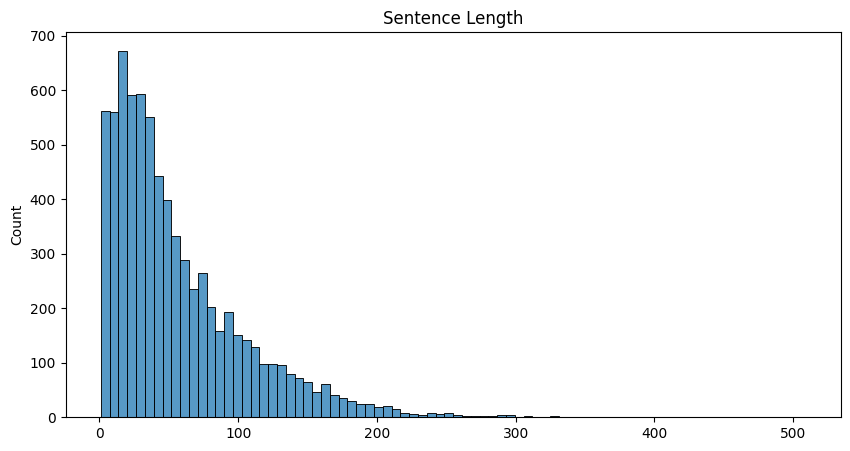

In [12]:
# Histogram of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(x) for x in df.clean_text], bins=80)
plt.title('Sentence Length')
plt.show()

In [13]:
# Check the max length of a sentence
max_len = max([len(x) for x in df.clean_text])
print(f'Max sentence length: {max_len}')

# Variable that sums of sentences with length greater than 250
sum_val = sum([1 for x in df.clean_text if len(x) > 200])

# Number of sentences have length greater than 250
print(f'Number of sentences with length greater than 250: {sum_val}')

# Total number of tweets in the dataframe
print(f'Number of tweets in the dataframe: {df.shape[0]}')

# Percentage of sentences with length greater than 250
print(f'Percentage of sentences with length greater than 250: {sum_val*100/df.shape[0]:.4f}%')

Max sentence length: 509
Number of sentences with length greater than 250: 126
Number of tweets in the dataframe: 7380
Percentage of sentences with length greater than 250: 1.7073%


In [14]:
# convert emotions to numeric values read unique emotions
emotions = df.emotion.unique()

# create a dictionary to map emotions to numeric values
emotion_to_num = {emotion:idx for idx, emotion in enumerate(emotions)}
num_to_emotion = {idx:emotion for idx, emotion in enumerate(emotions)}

In [15]:
num_to_emotion

{0: 'hap', 1: 'ang', 2: 'neu', 3: 'fru', 4: 'sad', 5: 'exc'}

In [16]:
# Create label list for the confusion matrix
labels_list = list(num_to_emotion.values())
labels_list

['hap', 'ang', 'neu', 'fru', 'sad', 'exc']

In [17]:
# map emotions to numeric values
df['num_label'] = df['emotion'].map(emotion_to_num)
df.head(10)

,filename,filepath,emotion,transcription,dataset,emotion_label,gender,method,session,clean_text,num_label
1,Ses04M_script02_2_M040,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,I don't know. It seemed like a good spot to m...,IEMOCAP,happy,M,script,4,i do not know it seem like a good spot to me i...,0
2,Ses04M_script02_2_M041,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,hap,"Shh. If we're very quiet, the fish might come.",IEMOCAP,happy,M,script,4,shh if we be very quiet the fish might come,0
5,Ses04M_script02_2_F029,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,But this isn't anything like I thought anythin...,IEMOCAP,angry,M,script,4,but this be not anything like i think anything...,1
6,Ses04M_script02_2_M034,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,"No, I know, me neither.",IEMOCAP,angry,M,script,4,no i know me neither,1
7,Ses04M_script02_2_M020,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"Wait a minute, I've got it.",IEMOCAP,neutral,M,script,4,wait a minute i have get it,2
10,Ses04M_script02_2_M021,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"It was in the car, right? Driving past the Kn...",IEMOCAP,neutral,M,script,4,it be in the car right drive past the knickerb...,2
11,Ses04M_script02_2_M035,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,fru,I'm doing the best I can.,IEMOCAP,frustrated,M,script,4,i be do the best i can,3
12,Ses04M_script02_2_F028,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,ang,"Oh, right, sure. This is standing on the beac...",IEMOCAP,angry,M,script,4,oh right sure this be stand on the beach this ...,1
13,Ses04M_script02_2_F000,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,neu,"Look at this, goose bumps.",IEMOCAP,neutral,M,script,4,look at this goose bump,2
16,Ses04M_script02_2_F016,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,sad,"It was about four years ago, right after we go...",IEMOCAP,sad,M,script,4,it be about four year ago right after we get m...,4


In [18]:
df.shape

(7380, 11)

# Audio pre-processing

During the steps below we will apply normalisation to the audio files to ensure consitency. The steps applied are:

•	Normalise audio volume \
•	Apply low pass filter to reduce noise


In [3]:
# Load the audio file
audio_file = df.filepath.iloc[0]
audio, sr = lb.load(audio_file)

# play audio file
Audio(audio, rate=sr)


NameError: name 'df' is not defined

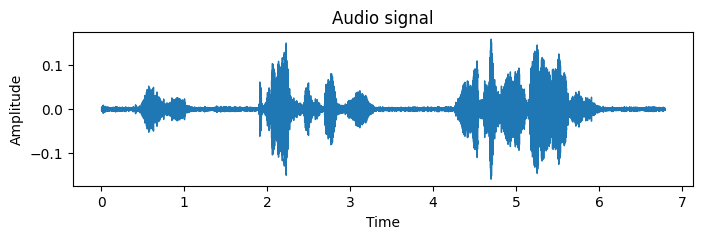

In [25]:
# Plot the audio signal
plt.figure(figsize=(8, 2))
lb.display.waveshow(audio, sr=sr)
plt.title('Audio signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [125]:
def create_folders(datasets, path = 'NormalisedAudio'):
    """
        This function creates folders for each dataset to add the normalised files
        df: Dataframe
        col: Column name
        path: Path to create the folders
    """
    # Get the locale types from the pd dataframe
    make_dir = path + '/' + datasets
    # create a directory for each type
    for dir in make_dir:
        os.makedirs(dir, exist_ok=True) 
        

def normalise_lpass(audio_file, output_file):
    """
        This function applies the normalisation and low pass filter to the audio file
        audio_file: Input audio file path
        output_file: Output audio file pathname
    """
    # Load the audio file with librosa
    audio, sr = lb.load(audio_file)

    # Normalise the audio using librosa
    normalised_audio = lb.util.normalize(audio)

    # Add low pass filter to improve the audio quality and remove some of the background noise
    a, b = signal.butter(20, 6000/(sr/2), btype='lowpass')
    rn_lpass = signal.lfilter(a,b,normalised_audio)

    # output the new file
    sf.write(output_file, rn_lpass, sr)
    print(f'Successfully normalised: {output_file}')


def audio_preprocessing(df, file_loc, dataset = 'dataset', output_loc='NormalisedAudio', filename='filename'):
    for idx, row in df.iterrows():
        input_file = row[file_loc]
        output_file = output_loc + '/' + row[dataset]  + '/' + row[filename] + '_NR.wav'

        # write to df a new column nr_filepath the output file
        df.loc[idx, 'nr_filepath'] = output_file
        normalise_lpass(input_file, output_file)

# Function to iterate over the file list in the dataframe and call the normalise_lpass function
audio_preprocessing(df, 'filepath')



Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M040_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M041_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_F029_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M034_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M020_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M021_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M035_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_F028_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_F000_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_F016_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_M037_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses04M_script02_2_F007_NR.wav
Successfully normalised: NormalisedAudio/IEMOCAP/Ses

In [188]:
# add image path to the dataframe
df['image_path'] = 'IEMOCAP/img/' + df['filename'] + '.png'

In [190]:
# df

In [2]:
# read csv
df = pd.read_csv('Data/Final_DF_Transcript_all.csv')

# df = df[df['dataset'] == 'IEMOCAP']
df

,dataset,filename,filepath,transcription,emotion_label,clean_text,emotion_num,nr_filepath,asr_transcription
0,IEMOCAP,Ses04M_script02_2_M040,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,I don't know. It seemed like a good spot to m...,happy,i do not know it seem like a good spot to me i...,6,NormalisedAudio/IEMOCAP/Ses04M_script02_2_M040...,i don't know it seemed like a good spot to me ...
1,IEMOCAP,Ses04M_script02_2_M041,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,"Shh. If we're very quiet, the fish might come.",happy,shh if we be very quiet the fish might come,6,NormalisedAudio/IEMOCAP/Ses04M_script02_2_M041...,it were very quiet the fish might come
2,IEMOCAP,Ses04M_script02_2_F029,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,But this isn't anything like I thought anythin...,angry,but this be not anything like i think anything...,1,NormalisedAudio/IEMOCAP/Ses04M_script02_2_F029...,but this isn't anything like i thought anythin...
3,IEMOCAP,Ses04M_script02_2_M034,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,"No, I know, me neither.",angry,no i know me neither,1,NormalisedAudio/IEMOCAP/Ses04M_script02_2_M034...,no i know me neither
4,IEMOCAP,Ses04M_script02_2_M020,Data/IEMOCAP/Session4/sentences/wav/Ses04M_scr...,"Wait a minute, I've got it.",neutral,wait a minute i have get it,0,NormalisedAudio/IEMOCAP/Ses04M_script02_2_M020...,i wait a minit i've got it
...,...,...,...,...,...,...,...,...,...
21229,MELD,test_dia279_utt11,Data/MELD/test/mp4/test_dia279_utt11.mp4,"Yeah, I mean, come on Ross, no one will even n...",neutral,yeah i mean come on ross no one will even noti...,0,NormalisedAudio/MELD/test_dia279_utt11_NR.wav,NaN
21230,MELD,test_dia279_utt12,Data/MELD/test/mp4/test_dia279_utt12.mp4,They're not listening too me?,surprise,they be not listen too me,5,NormalisedAudio/MELD/test_dia279_utt12_NR.wav,NaN
21231,MELD,test_dia279_utt13,Data/MELD/test/mp4/test_dia279_utt13.mp4,Of course they're listening to you! Everybody ...,neutral,of course they be listen to you everybody list...,0,NormalisedAudio/MELD/test_dia279_utt13_NR.wav,NaN
21232,MELD,test_dia279_utt14,Data/MELD/test/mp4/test_dia279_utt14.mp4,Monica you really think I should try this phas...,neutral,monica you really think i should try this phas...,0,NormalisedAudio/MELD/test_dia279_utt14_NR.wav,NaN


In [4]:
df = df.sample(1000)

# Data split

The dataset for this project will be split into training, validation, and test sets. Following the ratio 80:10:10, respectively.

In [5]:
# create a function to split the dataset into train, validation and test sets
def split_data(df, stratify_col, train_test_size=0.2, val_test_size=0.5, random_state=42):
    """
        This function splits the dataset into train, validation and test sets
        df: Dataframe to split
        test_size: Size of the test set
        val_size: Size of the validation set
        random_state: Random state for reproducibility
        return: Train, validation and test sets
    """
    # Split the dataframe into train and test sets (80/20)
    train_df, test_df = train_test_split(df, test_size=train_test_size, random_state=random_state, stratify=df[stratify_col])

    # Split the train set into train and validation sets (50/50)
    val_df, test_df = train_test_split(test_df, test_size=val_test_size, random_state=random_state, stratify=test_df[stratify_col])

    return train_df, val_df, test_df

In [6]:
# Split the dataframe into train, validation and test sets
train_df, val_df, test_df = split_data(df, 'emotion_num')

We can investigate the results by printing the shape of each dataset. Furthermore, we can also check if the stratify worked correctly as the dataset is imbalanced.

In [7]:
train_df.shape, val_df.shape, test_df.shape

((800, 9), (100, 9), (100, 9))

In [8]:
# count the number of emotion labels in each set
print(f'{train_df.emotion_label.value_counts()}\n')
print(f'{val_df.emotion_label.value_counts()}\n')
print(f'{test_df.emotion_label.value_counts()}\n')

emotion_label
neutral       315
angry          98
sad            84
joy            82
frustrated     71
surprise       65
happy          59
fear           15
disgust        11
Name: count, dtype: int64

emotion_label
neutral       39
angry         12
joy           11
sad           10
frustrated     9
happy          8
surprise       8
fear           2
disgust        1
Name: count, dtype: int64

emotion_label
neutral       40
angry         12
sad           11
joy           10
frustrated     9
surprise       8
happy          7
fear           2
disgust        1
Name: count, dtype: int64



## Tokenization for text classification

Machine learning models cannot simply read the text as is, hence text must be transformed into a model-compatible format, therefore words must be tokenized, which is a process that translates words to a numerical representation

In [9]:
# Create the tokenizer object using the BERT vocab bert-base-uncased file
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [10]:
# Function to tokenize the sentences using the BERT tokenizer
def bert_tokenizer(sentence, labels_val, max_len):
    """
        Perform required preprocessing steps for pretrained BERT.
        sentence: Sentence to tokenize
        labels: List of labels to be encoded
        max_len: Max length of the sentence (truncating point/padding point)
        return: Tokenized sentence
    """

    # Initialise lists to store outputs
    input_ids = []
    attention_masks = []

    # Iterate through each sentence and encode them
    # https://huggingface.co/transformers/v2.11.0/_modules/transformers/tokenization_utils.html#PreTrainedTokenizer.encode_plus
    # encode_plus method ^^
    for sent in sentence:
        try:
            encoded_sent = tokenizer.encode_plus(
                text = sent,                    # Sentence to encode
                add_special_tokens = True,      # [CLS] and [SEP] tokens
                max_length = max_len,           # Max length
                padding = 'max_length',         # Pad sentence to max length
                truncation = True,              # Truncate if longer than max length
                return_attention_mask = True    # Return attention mask
                )
        except:
            print(sent)
            break

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to numpy arrays for training/prediction
    input_ids = np.array(input_ids, dtype='int64')
    attention_masks = np.array(attention_masks, dtype='int64')
    labels = np.array(labels_val, dtype='int64')

    return input_ids, attention_masks, labels

In [12]:
# show nan values in the clean_text column
df[df['clean_text'].isna()]

,dataset,filename,filepath,transcription,emotion_label,clean_text,emotion_num,nr_filepath,asr_transcription


In [13]:
# fill na with Exclamation
df['clean_text'].fillna('Exclamation', inplace=True)

In [14]:
df

,dataset,filename,filepath,transcription,emotion_label,clean_text,emotion_num,nr_filepath,asr_transcription
8627,MELD,train_dia119_utt9,Data/MELD/train/mp4/train_dia119_utt9.mp4,"No, those first two windows, that's the lobby.",neutral,no those first two window that be the lobby,0,NormalisedAudio/MELD/train_dia119_utt9_NR.wav,NaN
13342,MELD,train_dia615_utt18,Data/MELD/train/mp4/train_dia615_utt18.mp4,"Oh, ""you do, do you""?",angry,oh you do do you,1,NormalisedAudio/MELD/train_dia615_utt18_NR.wav,NaN
18941,MELD,test_dia34_utt6,Data/MELD/test/mp4/test_dia34_utt6.mp4,"Say it louder, I don't think the guy all the w...",disgust,say it loud i do not think the guy all the way...,8,NormalisedAudio/MELD/test_dia34_utt6_NR.wav,NaN
5461,IEMOCAP,Ses05F_impro01_F001,Data/IEMOCAP/Session5/sentences/wav/Ses05F_imp...,"Okay, I'm sorry, but I just stood in this line...",frustrated,okay i be sorry but i just stood in this line ...,4,NormalisedAudio/IEMOCAP/Ses05F_impro01_F001_NR...,oh kay i'm sorry but i just stood in this line...
6269,IEMOCAP,Ses01M_impro07_F013,Data/IEMOCAP/Session1/sentences/wav/Ses01M_imp...,"Oh, you don't like that. You're west-sider?",happy,oh you do not like that you be west sider,6,NormalisedAudio/IEMOCAP/Ses01M_impro07_F013_NR...,ah you don't like that you're west sider
...,...,...,...,...,...,...,...,...,...
7159,IEMOCAP,Ses01F_impro03_M006,Data/IEMOCAP/Session1/sentences/wav/Ses01F_imp...,He turned to you and was like...,neutral,he turn to you and be like,0,NormalisedAudio/IEMOCAP/Ses01F_impro03_M006_NR...,he turned to you and was like
13843,MELD,train_dia660_utt9,Data/MELD/train/mp4/train_dia660_utt9.mp4,I already feel like I know you a little better!,joy,i already feel like i know you a little good,2,NormalisedAudio/MELD/train_dia660_utt9_NR.wav,NaN
9918,MELD,train_dia252_utt1,Data/MELD/train/mp4/train_dia252_utt1.mp4,"Well, it's technically not a zoo per se, it's ...",neutral,well it be technically not a zoo per se it be ...,0,NormalisedAudio/MELD/train_dia252_utt1_NR.wav,NaN
17155,MELD,train_dia1007_utt3,Data/MELD/train/mp4/train_dia1007_utt3.mp4,"Nimitz, and sold over 2,000 boxes.",angry,nimitz and sell over 2 000 box,1,NormalisedAudio/MELD/train_dia1007_utt3_NR.wav,NaN


Execute the tokenization to all datasets using the bert_tokenizer function.

In [15]:
# Set the maximum length of the sentences
max_len = 200

# Tokenize the train, validation and test sets
train_inputs, train_masks, train_labels = bert_tokenizer(train_df['clean_text'], train_df['emotion_num'], max_len)
val_inputs, val_masks, val_labels = bert_tokenizer(val_df['clean_text'],  val_df['emotion_num'], max_len)
test_inputs, test_masks, test_labels = bert_tokenizer(test_df['clean_text'], test_df['emotion_num'], max_len)

# Print the shapes of the inputs
print(f'Train input_ids shape: {train_inputs.shape}')
print(f'Validation input_ids shape: {val_inputs.shape}')
print(f'Test input_ids shape: {test_inputs.shape}')

Train input_ids shape: (800, 200)
Validation input_ids shape: (100, 200)
Test input_ids shape: (100, 200)


Printing an example of a tokenized sentence

In [16]:
# Print the original train input sentence and its tokenized ids
rand = np.random.randint(0, train_inputs.shape[0])

print(f'Original train sentence: {train_df.clean_text.iloc[rand]}')
print(f'Token ids of train sentence: {train_inputs[rand]}')
print(f'Decoded train sentence: {tokenizer.decode(train_inputs[rand])}')

Original train sentence: i ride a bike
Token ids of train sentence: [ 101 1045 4536 1037 7997  102    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    

### BERT Pre-Trained Model

The text model was built using a pre-trained model that is widely known in the NLP industry for its proven effectiveness. TFBertForSequenceClassification was used for the implementation, it combines BERT with a sequence classification head, ideal for text analysis. The 'bert-base-uncased' was used for transfer learning, pre-trained on BookCorpus and English Wikipedia. Training included the inputs, attention masks, and a dropout (0.2) to prevent overfitting. The final layer utilizes softmax activation to output projections.

In [17]:
# Tokenizer vocab_size
vocab_size = len(tokenizer.vocab)
print(f'Vocab size: {vocab_size}')

Vocab size: 30522


In [18]:
len_labels = len(df.emotion_num.unique())
len_labels

9

In [19]:
bert_pretrained = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',          # 12-layer BERT model uncased vocab.
    num_labels = len_labels)      # The number of output labels

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
def build_text_model(bert_model, shape_size):
    """
        This function builds the BERT Text model
        bert_model: BERT pretrained model
        shape_size: Shape size of the input
        return: BERT model
    """
    input_ids = Input(shape=(shape_size,), dtype=tf.int32, name='input_ids') # input ids layer
    attention_masks = Input(shape=(shape_size,), dtype=tf.int32, name='attention_masks') # attention masks layer

    output = bert_model(input_ids, attention_masks)[0] # Output of the BERT model last hidden state
    output = Dropout(0.5)(output) # Dropout layer to reduce overfitting
    output = Dense(len_labels, activation='softmax')(output) # Dense layer for classification
    model = Model(inputs = [input_ids, attention_masks],outputs = output)

    return model

# Build the BERT model
bert_model = build_text_model(bert_pretrained, max_len)
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_masks (InputLaye  [(None, 200)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1094868   ['input_ids[0][0]',           
 ification_1 (TFBertForSequ  (loss=None, logits=(None,    54         'attention_masks[0][0]']     
 enceClassification)         6),                                                              

In [ ]:
# bert_model.load_weights('/content/drive/MyDrive/BERT/bert_model_2exec.keras')

In [40]:
bert_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=2e-05, epsilon=1e-08),
              metrics=['accuracy']
)

In [79]:
h_bert = bert_model.fit(
    [train_inputs, train_masks],
    train_labels,
    validation_data=([val_inputs, val_masks], val_labels),
    epochs=10,
    batch_size=16,
    callbacks=[
        ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001),
        EarlyStopping(monitor='val_accuracy', patience=4)
    ]
)

Epoch 1/10
370/377 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
# bert_model.save_weights('/content/drive/MyDrive/BERT/bert_model_IEMOCAP.keras')

In [ ]:
bert_model.load_weights('/content/drive/MyDrive/BERT/bert_model_IEMOCAP.keras')

In [ ]:
# Predict the results using the unseen test inputs
y_pred_bert= bert_model.predict([test_inputs, test_masks])
y_pred_bert = np.argmax(y_pred_bert, axis=1)

# print the index to class and the algorithm performance
print(index_to_class)
print(classification_report(test_labels, y_pred_bert))

24/24 [==============================] - 6s 140ms/step
              precision    recall  f1-score   support

           0       0.41      0.38      0.40        60
           1       0.54      0.56      0.55       110
           2       0.49      0.53      0.51       170
           3       0.52      0.53      0.52       185
           4       0.63      0.65      0.64       109
           5       0.59      0.45      0.51       104

    accuracy                           0.53       738
   macro avg       0.53      0.52      0.52       738
weighted avg       0.53      0.53      0.53       738



### TextCNN

In [20]:
embedding_dim=256

# Build the model
textcnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Masking(mask_value=0.0), # Masking layer for variable length sequences
    # 1st One-dim convolutional layer with kernel size 3 and relu activation
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    # 2nd Conv1D layer with kernel size 4 and relu activation
    Conv1D(filters=64, kernel_size=4, activation='relu'),
    Dropout(0.2), # Dropout layer to reduce overfitting
    # 3rd Conv1D layer with kernel size 4 and relu activation
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(), # Pooling for feature extraction
    Dropout(0.5), # Dropout layer to reduce overfitting
    Dense(64, activation='relu'), # Dense layer with ReLU
    Dense(len_labels, activation='softmax') # Output layer
])

# Compile the model
textcnn_model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0001, epsilon=1e-08),
        metrics=['accuracy']
)

# Print the model summary
textcnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          7813632   
                                                                 
 masking (Masking)           (None, 200, 256)          0         
                                                                 
 conv1d (Conv1D)             (None, 198, 128)          98432     
                                                                 
 conv1d_1 (Conv1D)           (None, 195, 64)           32832     
                                                                 
 dropout_38 (Dropout)        (None, 195, 64)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 191, 32)           10272     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0

In [21]:
# Train the model
h_textcnn = textcnn_model.fit(
    train_inputs,
    train_labels,
    validation_data=(val_inputs, val_labels),
    epochs=10,
    batch_size=64,
    callbacks=[
        ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001),
        EarlyStopping(monitor='val_accuracy', patience=4)
    ]
)

Epoch 1/10
13/13 [==============================] - 6s 316ms/step - loss: 2.1834 - accuracy: 0.1238 - val_loss: 2.1754 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 2/10
13/13 [==============================] - 3s 256ms/step - loss: 2.1605 - accuracy: 0.1975 - val_loss: 2.1532 - val_accuracy: 0.3900 - lr: 1.0000e-04
Epoch 3/10
13/13 [==============================] - 3s 262ms/step - loss: 2.1259 - accuracy: 0.2488 - val_loss: 2.1202 - val_accuracy: 0.3900 - lr: 1.0000e-04
Epoch 4/10
13/13 [==============================] - 3s 257ms/step - loss: 2.0841 - accuracy: 0.3075 - val_loss: 2.0802 - val_accuracy: 0.3900 - lr: 1.0000e-04
Epoch 5/10
13/13 [==============================] - 3s 248ms/step - loss: 2.0739 - accuracy: 0.3425 - val_loss: 2.0497 - val_accuracy: 0.3900 - lr: 1.0000e-04
Epoch 6/10
13/13 [==============================] - 3s 263ms/step - loss: 2.0098 - accuracy: 0.3688 - val_loss: 2.0246 - val_accuracy: 0.3900 - lr: 1.0000e-04


# 2D CNN Audio emotion recognition

2. Reshaped Array Shape:

(1, features.shape[0], features.shape[1], 1) indicates a 4D array with:

Batch size: 1 (as only one audio file was processed at a time)

Time dimension: features.shape[0] (number of time frames in the features)

Frequency dimension: features.shape[1] (number of frequency bins in the features)

Channel dimension: 1 (as the features were single-channel) /  

The standardise function, calculates the standard deviation and mean values, followed by subtracting the mean from each feature and dividing by the standard deviation which generates a value between 0 and 1, ensuring consistent scales, that consequently mitigates bias in the learning process.

In [11]:
def standardise(features):
    # calculate the standard dev
    std = np.std(features, axis=0)
    std[std == 0] = 1e-10 # handle division by zero by replacing it with small val
    mean = features.mean(axis=0)
    features = (features - mean) / std

    return features

The extract_audio_features function utilising librosa extracts the MFCC, ZCR, Chroma, RMS and Mel features in frequency bin format, which are stacked and standardised. 

In [12]:
def extract_audio_features(file_path):
    """
        Extract MFCC, ZCR, Chroma, RMS and mel features from the audio files.
        file_path: Path to the audio file to extract features from
        return: Tuple containing the extracted features
    """

    # Extract features
    audio, sr = lb.load(file_path)

    # MFCC
    mfcc = lb.feature.mfcc(y=audio, sr=sr, n_mfcc=20, n_fft=2048, hop_length=512)

    # Zero-crossing rate
    zcr = lb.feature.zero_crossing_rate(y=audio)

    # Chroma_stft
    stft  = np.abs(lb.stft(audio))
    chroma = lb.feature.chroma_stft(S=stft, sr=sr)

    # RMS
    rms = lb.feature.rms(y=audio)

    # MelSpectogram
    mel = lb.feature.melspectrogram(y=audio, sr=sr)

    # Combine features into a 2D array
    # Transpose the values making rows the features and columns the observations
    features = np.vstack([mfcc, zcr, chroma, rms, mel]).T
    features = standardise(features)

    # Reshape the features to match the format for the CNN
    features = features.reshape(1, features.shape[0], features.shape[1], 1)

    return features

The results are padded or truncated to maintain consistency accross the lenght sizes

In [13]:
# pad the longest feature length
def pad_features(features):
    """
        Pad the longest feature length
        features: List of features to pad
        return: Padded features
    """
    # set the max length of features to 400
    max_length = 400

    #iterate over the features list and pad if the length is less than the max length else truncate to the max length
    for i in range(len(features)):
        if features[i].shape[1] < max_length:
            features[i] = np.pad(features[i], ((0, 0), (0, max_length - features[i].shape[1]), (0, 0), (0, 0)), mode='constant')
        else:
            features[i] = features[i][:, :max_length, :, :]

    return features

Iterate over the files and return the encoded values and their respective labels

In [18]:
def load_data(df):
    X = []
    # iterate over the file paths to extract the features
    for file in df.nr_filepath:
        feature=extract_audio_features(file)
        X.append(feature)

    # pad the features
    X = pad_features(X)

    # Combine features from all files into a single NumPy array
    X = np.concatenate(X, axis=0)

    # convert df emotion_num to list
    y = df.emotion_num.to_list()

    return X,y

In [19]:
train_df

,dataset,filename,filepath,transcription,emotion_label,clean_text,emotion_num,nr_filepath,asr_transcription
2211,IEMOCAP,Ses03F_script01_3_M026,Data/IEMOCAP/Session3/sentences/wav/Ses03F_scr...,"No, no, no, no. Nothing like that.",neutral,no no no no nothing like that,0,NormalisedAudio/IEMOCAP/Ses03F_script01_3_M026...,no no no no nothing like that
10560,MELD,train_dia319_utt6,Data/MELD/train/mp4/train_dia319_utt6.mp4,And I feel like I've conquered the business wo...,angry,and i feel like i have conquer the business wo...,1,NormalisedAudio/MELD/train_dia319_utt6_NR.wav,NaN
9175,MELD,train_dia176_utt7,Data/MELD/train/mp4/train_dia176_utt7.mp4,"Wow, Monica, you look just like your grandmoth...",surprise,wow monica you look just like your grandmother...,5,NormalisedAudio/MELD/train_dia176_utt7_NR.wav,NaN
18436,MELD,dev_dia91_utt6,Data/MELD/dev/mp4/dev_dia91_utt6.mp4,"Ok, would people stop drinking the breast milk?",disgust,ok would people stop drink the breast milk,8,NormalisedAudio/MELD/dev_dia91_utt6_NR.wav,NaN
10299,MELD,train_dia295_utt9,Data/MELD/train/mp4/train_dia295_utt9.mp4,"And now Pheebs, you're doing the same thing!",angry,and now pheebs you be do the same thing,1,NormalisedAudio/MELD/train_dia295_utt9_NR.wav,NaN
...,...,...,...,...,...,...,...,...,...
19893,MELD,test_dia134_utt3,Data/MELD/test/mp4/test_dia134_utt3.mp4,"Stupid, useless Canadian money!",angry,stupid useless canadian money,1,NormalisedAudio/MELD/test_dia134_utt3_NR.wav,NaN
1298,IEMOCAP,Ses04F_script02_2_F010,Data/IEMOCAP/Session4/sentences/wav/Ses04F_scr...,We never do. Do we have we ever?,angry,we never do do we have we ever,1,NormalisedAudio/IEMOCAP/Ses04F_script02_2_F010...,we never do do we have we ever
9026,MELD,train_dia160_utt18,Data/MELD/train/mp4/train_dia160_utt18.mp4,"Yeah, you bet.",neutral,yeah you bet,0,NormalisedAudio/MELD/train_dia160_utt18_NR.wav,NaN
15942,MELD,train_dia887_utt6,Data/MELD/train/mp4/train_dia887_utt6.mp4,"Let me get this straight man, you attacked you...",angry,let me get this straight man you attack your e...,1,NormalisedAudio/MELD/train_dia887_utt6_NR.wav,NaN


In [30]:
len_labels = len(df.emotion_num.unique())
len_labels

9

In [115]:
# load the data for the train, val and test sets
X_train, y_train = load_data(train_df)
X_val, y_val = load_data(val_df)
X_test, y_test = load_data(test_df)

In [116]:
# convert the labels to categorical (one hot vector)
y_train = to_categorical(y_train, num_classes=len_labels)
y_val = to_categorical(y_val, num_classes=len_labels)
y_test = to_categorical(y_test, num_classes=len_labels)

X values should have 4 dimensions

y values should have 2 dimensions

In [117]:
# print the shape of the data
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800, 400, 162, 1),
 (800, 9),
 (100, 400, 162, 1),
 (100, 9),
 (100, 400, 162, 1),
 (100, 9))

Build the Audio model

The audio model employs a Conv2D architecture built using a sequential tf.keras model, containing multiple Conv2D layers and several filter widths sizes (256, 128, 64). This filter approach collects information at various spatial scales, with bigger filters capturing wider patterns and smaller filters capturing finer details. To down-sample spatial data while keeping critical information during feature extraction, MaxPooling2D layers are used. To avoid overfitting, two Dropout layers for regularisation were added and a dense layer with softmax to output emotion class predictions.

In [31]:
audio_model = Sequential([
    # initial layer with input shape
    Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    # Masking layer to mask the padded values
    Masking(mask_value=0.0),
    # MaxPooling2D to downsample the feature maps
    MaxPooling2D((2, 2)),
    # Conv2D layer with 256 filters and relu activation
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5), # Dropout layer to reduce overfitting
    # Conv2D layer with 128 filters and relu activation
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    # Conv2D layer with 64 filters and relu activation
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(), # Flatten layer to convert 2D to 1D
    Dropout(0.5), # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    Dense(len_labels, activation='softmax') # Output layer
])

In [32]:
audio_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=2e-05, epsilon=1e-08),
              metrics=['accuracy']
)

audio_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 400, 162, 256)     2560      
                                                                 
 masking_3 (Masking)         (None, 400, 162, 256)     0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 200, 81, 256)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 81, 256)      590080    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 100, 40, 256)      0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 100, 40, 256)      0

In [33]:
history_audio = audio_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[
        ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001),
        EarlyStopping(monitor='val_accuracy', patience=4),
      ]
)

Epoch 1/20
50/50 [==============================] - 472s 9s/step - loss: 2.0446 - accuracy: 0.3300 - val_loss: 1.9673 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 2/20
30/50 [=================>............] - ETA: 2:23 - loss: 1.8749 - accuracy: 0.4146

KeyboardInterrupt: 

In [ ]:
audio_model.save('/content/drive/MyDrive/BERT/CNN2D_model_IEMOCAP.keras')

In [ ]:
# test model
audio_model.evaluate(X_test, y_test)

# predict on test data
y_pred = audio_model.predict(X_test)

# convert predictions to one hot vectors
y_pred = np.argmax(y_pred, axis=1)

# Convert from one hot vectors to integers
y_labels = np.argmax(y_test, axis=1)

# print history classification_report
print(classification_report(y_labels, y_pred))

24/24 [==============================] - 1s 41ms/step


2

In [ ]:
# print history classification_report
print(classification_report(y_labels, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.02      0.03        60
           1       0.46      0.33      0.38       110
           2       0.35      0.52      0.42       170
           3       0.35      0.41      0.38       185
           4       0.42      0.63      0.51       109
           5       0.21      0.05      0.08       104

    accuracy                           0.37       738
   macro avg       0.33      0.33      0.30       738
weighted avg       0.35      0.37      0.34       738



# Conv2D with LSTM

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, TimeDistributed, Flatten, Reshape

# Define your model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), input_shape=(None, 400, 162, 1))
# model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=(None, 400, 162, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into LSTM layer
model.add(Flatten())

# LSTM layers
# model.add(LSTM(units=64, return_sequences=False))  # Set return_sequences=True if you want to stack LSTMs

# Dense layers for classification
model.add(Dense(9, activation='softmax'))  # Assuming num_classes is the number of classes for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/kl/t_5dx_0n3j5_k06fyw32v4q40000gn/T/ipykernel_15105/744908428.py", line 8, in <module>
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), input_shape=(None, 400, 162, 1))
  File "/usr/local/lib/python3.11/site-packages/tensorflow/python/trackable/base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [143]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, TimeDistributed, Flatten, Reshape

# # Define the model architecture
# model = tf.keras.Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(None, 400, 162, 1)),  # Adjusted input shape
#     MaxPooling2D((2, 2)),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Reshape((200 * 100 * 32,)),  # Adjusted reshape based on previous layers
#     LSTM(64),
#     Dense(10, activation='softmax')  # Adjust output units for number of classes
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [144]:
# # train the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[
#         ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001),
#         EarlyStopping(monitor='val_accuracy', patience=4)
#     ])

In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(X_train.shape[1], X_train.shape[2], 1)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(5, 4)),
        layers.Conv2D(8, (1, 4), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(6, 5)),
        layers.TimeDistributed(layers.Flatten()),
        layers.Bidirectional(layers.LSTM(8)),
        layers.Dense(9, activation='softmax')
    ]

)

model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adadelta(),
    metrics = ["accuracy"],
)

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 400, 162, 256)     2560      
                                                                 
 batch_normalization_10 (Ba  (None, 400, 162, 256)     1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_120 (MaxPool  (None, 80, 40, 256)       0         
 ing2D)                                                          
                                                                 
 conv2d_124 (Conv2D)         (None, 80, 40, 8)         8200      
                                                                 
 batch_normalization_11 (Ba  (None, 80, 40, 8)         32        
 tchNormalization)                                               
                                                     

In [149]:
import torch
from transformers import HubertForSequenceClassification, Wav2Vec2FeatureExtractor
from torchaudio import load

# Load pre-trained HuBERT model
model_name = "facebook/hubert-large-ls960-ft"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = HubertForSequenceClassification.from_pretrained(model_name)


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['projector.bias', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'classifier.weight', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'projector.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [151]:
# Load audio file
audio_filepath = "NormalisedAudio/IEMOCAP/Ses01F_impro01_F005_NR.wav"
audio, sample_rate = load(audio_filepath)

# Resample to model's expected sampling rate
resampler = torchaudio.transforms.Resample(sample_rate, feature_extractor.sampling_rate)
audio = resampler(audio).squeeze().numpy()

# Extract features using HuBERT feature extractor
inputs = feature_extractor(audio, sampling_rate=feature_extractor.sampling_rate, return_tensors="pt")


NameError: name 'torchaudio' is not defined

In [148]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[
        ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001),
        EarlyStopping(monitor='val_accuracy', patience=4)
    ])

Epoch 1/20


/usr/local/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: in user code:

    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(288,) and logits.shape=(32, 9)


In [108]:
# Add an additional dimension to represent time steps
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)

In [112]:
X_train.shape()

TypeError: 'tuple' object is not callable

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten

# Define your model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(400, 162, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into LSTM layer
model.add(Flatten())

# LSTM layer
model.add(LSTM(units=64, return_sequences=False))  # Adjust units and return_sequences according to your needs

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))  # Assuming num_classes is the number of classes for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


ValueError: Input 0 of layer "lstm_23" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 509440)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling2D, Flatten, Dense

# Define your model
model = Sequential()
model.add(ConvLSTM2D(256, (3, 3), input_shape=(X_train.shape[1], X_train.shape[2], 1), return_sequences=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), return_sequences=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len_labels, activation='softmax')) # Assuming num_classes is the number of classes for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


ValueError: Input 0 of layer "conv_lstm2d_23" is incompatible with the layer: expected ndim=5, found ndim=4. Full shape received: (None, 400, 162, 1)

# 1D Conv Audio Baseline

In [23]:
import librosa as lr

In [73]:
def extract_features(path):

    # extract the audio data and sample rate
    audio, sr = lr.load(path)

    # ZCR
    result = np.array([])
    
    # MFCC
    mfcc = np.mean(lb.feature.mfcc(y=audio, sr=sr, n_mfcc=20, n_fft=2048, hop_length=512))
    result = np.hstack((result, mfcc)) # stacking horizontally

    zcr = np.mean(lr.feature.zero_crossing_rate(y=audio).T, axis=0)
    result = np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(lr.stft(audio))
    chroma_stft = np.mean(lr.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(lr.feature.rms(y=audio).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(lr.feature.melspectrogram(y=audio, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [74]:
def load_data(df):
    X = []
    for file in df.nr_filepath:
        # print(file)
        # return
        feature=extract_features(file)
        # return
        X.append(feature)


    # convert num_label to list
    y = df.emotion_num.values.tolist()

    return X,y

In [75]:
# train_df

In [76]:
# X, Y = load_data(df)

X_train, y_train = load_data(train_df)

X_val, y_val = load_data(val_df)

X_test, y_test = load_data(test_df)

In [34]:
unique_labels = len(df['emotion_num'].unique())

In [79]:
X_train = np.array(X_train)
X_train = np.expand_dims(X_train, axis=2)

X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

X_test = np.array(X_test)
X_test = np.expand_dims(X_test, axis=2)

In [80]:
# one hot vector the Y values
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=unique_labels)

y_val = to_categorical(y_val, num_classes=unique_labels) 

y_test = to_categorical(y_test, num_classes=unique_labels)

In [81]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 143, 1), (800, 9), (100, 143, 1), (100, 9))

In [43]:
# X_train

In [82]:
conv1D_base_model = Sequential([
    # initial layer with input shape
    Conv1D(256, kernel_size=5, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=5, padding = 'same'),
    # Masking layer to mask the padded values
    Masking(mask_value=0.0),

    # Conv1D layer with 256 filters and relu activation and maxpooling to downsample the feature maps
    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=5, padding = 'same'),

    Dropout(0.5), # Dropout layer to reduce overfitting
    # Conv2D layer with 128 filters and relu activation
    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=5, padding = 'same'),

    # Conv2D layer with 64 filters and relu activation
    Conv1D(64, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=5, padding = 'same'),

    Flatten(), # Flatten layer to convert 2D to 1D
    Dense(32, activation='relu'),
    Dropout(0.3), # Dropout layer to reduce overfitting

    Dense(unique_labels, activation='softmax') # Output layer
])

# Compile the model
conv1D_base_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

conv1D_base_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_47 (Conv1D)          (None, 143, 256)          1536      
                                                                 
 max_pooling1d_44 (MaxPooli  (None, 29, 256)           0         
 ng1D)                                                           
                                                                 
 masking_11 (Masking)        (None, 29, 256)           0         
                                                                 
 conv1d_48 (Conv1D)          (None, 29, 256)           327936    
                                                                 
 max_pooling1d_45 (MaxPooli  (None, 6, 256)            0         
 ng1D)                                                           
                                                                 
 dropout_62 (Dropout)        (None, 6, 256)          

In [88]:
# import ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=conv1D_base_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_val, y_val), callbacks=[rlrp])

Epoch 1/20
 2/13 [===>..........................] - ETA: 0s - loss: 1.9115 - accuracy: 0.3828

13/13 [==============================] - 1s 75ms/step - loss: 1.9283 - accuracy: 0.3775 - val_loss: 1.9024 - val_accuracy: 0.3900 - lr: 1.6000e-04
Epoch 2/20
13/13 [==============================] - 1s 71ms/step - loss: 1.9070 - accuracy: 0.3825 - val_loss: 1.8897 - val_accuracy: 0.3900 - lr: 1.6000e-04
Epoch 3/20
13/13 [==============================] - 1s 64ms/step - loss: 1.9005 - accuracy: 0.3825 - val_loss: 1.9064 - val_accuracy: 0.3900 - lr: 1.6000e-04
Epoch 4/20
13/13 [==============================] - 1s 64ms/step - loss: 1.9105 - accuracy: 0.3862 - val_loss: 1.8810 - val_accuracy: 0.3900 - lr: 1.6000e-04
Epoch 5/20
13/13 [==============================] - 1s 62ms/step - loss: 1.9120 - accuracy: 0.3725 - val_loss: 1.9049 - val_accuracy: 0.3900 - lr: 1.6000e-04
Epoch 6/20
13/13 [==============================] - 1s 58ms/step - loss: 1.8978 - accuracy: 0.3825 - val_loss: 1.8982 - val_accuracy: 0.3900 - lr: 6.4000e-05
Epoch 7/20
13/13 [==============================] - 1s 59ms/ste

In [93]:
# test model
conv1D_base_model.evaluate(X_test, y_test)

# predict on test data
y_pred = conv1D_base_model.predict(X_test)

# convert predictions to one hot vectors
y_pred = np.argmax(y_pred, axis=1)

# Convert from one hot vectors to integers
y_labels = np.argmax(y_test, axis=1)

# print history classification_report
print(classification_report(y_labels, y_pred, zero_division=0))

4/4 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        39
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2

    accuracy                           0.39       100
   macro avg       0.04      0.11      0.06       100
weighted avg       0.15      0.39      0.22       100



# Conv1D with LSTM

In [89]:
conv1D_LSTM_model = Sequential([
    # initial layer with input shape
    Conv1D(256, kernel_size=5, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=5, padding = 'same'),
    # Masking layer to mask the padded values
    Masking(mask_value=0.0),

    # Conv1D layer with 256 filters and relu activation and maxpooling to downsample the feature maps
    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=5, padding = 'same'),
   
    # add bidirectional LSTM
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5), # Dropout layer to reduce overfitting
    MaxPooling1D(pool_size=5, padding = 'same'),

    Bidirectional(LSTM(64, return_sequences=True)),

    Flatten(), # Flatten layer to convert 2D to 1D
    Dense(32, activation='relu'),
    Dropout(0.3), # Dropout layer to reduce overfitting

    Dense(unique_labels, activation='softmax') # Output layer
])

# Compile the model
conv1D_LSTM_model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=2e-05, epsilon=1e-08),
        metrics=['accuracy']
)

conv1D_LSTM_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 143, 256)          1536      
                                                                 
 max_pooling1d_52 (MaxPooli  (None, 29, 256)           0         
 ng1D)                                                           
                                                                 
 masking_14 (Masking)        (None, 29, 256)           0         
                                                                 
 conv1d_56 (Conv1D)          (None, 29, 256)           327936    
                                                                 
 max_pooling1d_53 (MaxPooli  (None, 6, 256)            0         
 ng1D)                                                           
                                                                 
 bidirectional (Bidirection  (None, 6, 256)          

In [90]:
# Execute the model

history = conv1D_LSTM_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_val, y_val), callbacks=[rlrp])

Epoch 1/20
13/13 [==============================] - 14s 297ms/step - loss: 2.1655 - accuracy: 0.2087 - val_loss: 2.1140 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 2/20
13/13 [==============================] - 1s 108ms/step - loss: 2.1097 - accuracy: 0.3300 - val_loss: 2.0696 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 3/20
13/13 [==============================] - 1s 98ms/step - loss: 2.0686 - accuracy: 0.3600 - val_loss: 2.0278 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 4/20
13/13 [==============================] - 1s 103ms/step - loss: 2.0421 - accuracy: 0.3613 - val_loss: 1.9963 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 5/20
13/13 [==============================] - 1s 96ms/step - loss: 2.0370 - accuracy: 0.3700 - val_loss: 1.9699 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 6/20
13/13 [==============================] - 1s 91ms/step - loss: 2.0193 - accuracy: 0.3675 - val_loss: 1.9508 - val_accuracy: 0.3900 - lr: 2.0000e-05
Epoch 7/20
13/13 [==============================

In [92]:
# test model
conv1D_LSTM_model.evaluate(X_test, y_test)

# predict on test data
y_pred = conv1D_LSTM_model.predict(X_test)

# convert predictions to one hot vectors
y_pred = np.argmax(y_pred, axis=1)

# Convert from one hot vectors to integers
y_labels = np.argmax(y_test, axis=1)

# print history classification_report
print(classification_report(y_labels, y_pred))

4/4 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        39
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2

    accuracy                           0.39       100
   macro avg       0.04      0.11      0.06       100
weighted avg       0.15      0.39      0.22       100



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Fusion

In [ ]:
# Get individual predictions
audio_predict = audio_model.predict(X_test)
text_predict = bert_model.predict([test_inputs,test_masks])

24/24 [==============================] - 7s 141ms/step


In [ ]:
# Late fusion - concatenating the values from both trained models
fusion_inputs = np.concatenate((audio_predict, text_predict), axis=1)

fusion_model = Sequential([
    Dense(128, activation='relu', input_shape=(12,)),  # Dense input layer
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(64, activation='relu'), # Dense hidden layer
    Dense(len(df.num_label.unique()), activation='softmax') # Output layer
])

In [ ]:
fusion_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=2e-05, epsilon=1e-08),
              metrics=['accuracy']
)

fusion_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 6)                 390       
                                                                 
Total params: 10310 (40.27 KB)
Trainable params: 10310 (40.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_fusion = fusion_model.fit(
    fusion_inputs,
    test_labels,
    epochs=20,
    batch_size=128,
    callbacks=[
        ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
      ]
)

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4472 - accuracy: 0.4932 - lr: 1.0000e-07
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4457 - accuracy: 0.4810 - lr: 1.0000e-07
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4381 - accuracy: 0.4878 - lr: 1.0000e-07
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4449 - accuracy: 0.4729 - lr: 1.0000e-07
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4379 - accuracy: 0.4851 - lr: 1.0000e-07
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4474 - accuracy: 0.4824 - lr: 1.0000e-07
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.4421 - accuracy: 0.4756 - lr: 1.0000e-07
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4476 - accuracy: 0.4919 - lr: 1.0000e-07
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4454 - accuracy

In [ ]:
# predict on test data
y_pred = fusion_model.predict(fusion_inputs)

# convert predictions to one hot vectors
y_pred = np.argmax(y_pred, axis=1)

# print history classification_report
print(classification_report(test_labels, y_pred, zero_division=True))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        60
           1       0.79      0.34      0.47       110
           2       0.40      0.61      0.48       170
           3       0.47      0.64      0.55       185
           4       0.61      0.52      0.56       109
           5       0.59      0.50      0.54       104

    accuracy                           0.50       738
   macro avg       0.64      0.43      0.43       738
weighted avg       0.58      0.50      0.48       738



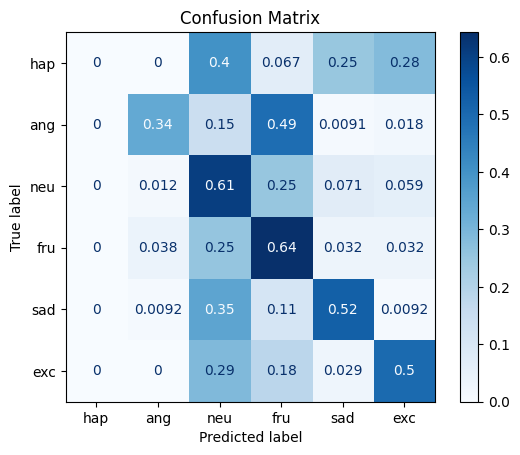

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(test_labels, y_pred, labels_list)

## Convert the MFCC feature to image

In [45]:
# Create a function that uses librosa to extract the MFCC to an image and save the image in a folder

# def extract_mfcc_image(file_path, output_path):
#     """
#         This function uses librosa to extract the MFCC to an image and save the image in a folder
#         file_path: Path to the audio file
#         output_path: Path to save the image
#     """

file_path = df.filepath.iloc[100]
output_path = 'test100.png'


# Load the audio file
audio, sr = lb.load(file_path)

# Extract MFCC features
mfcc = lb.feature.mfcc(y=audio, sr=sr)

# Convert the MFCC to an image
fig = plt.Figure()
# canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = lb.display.specshow(mfcc, ax=ax)
fig.savefig(output_path, dpi=1000, bbox_inches='tight', pad_inches=0)




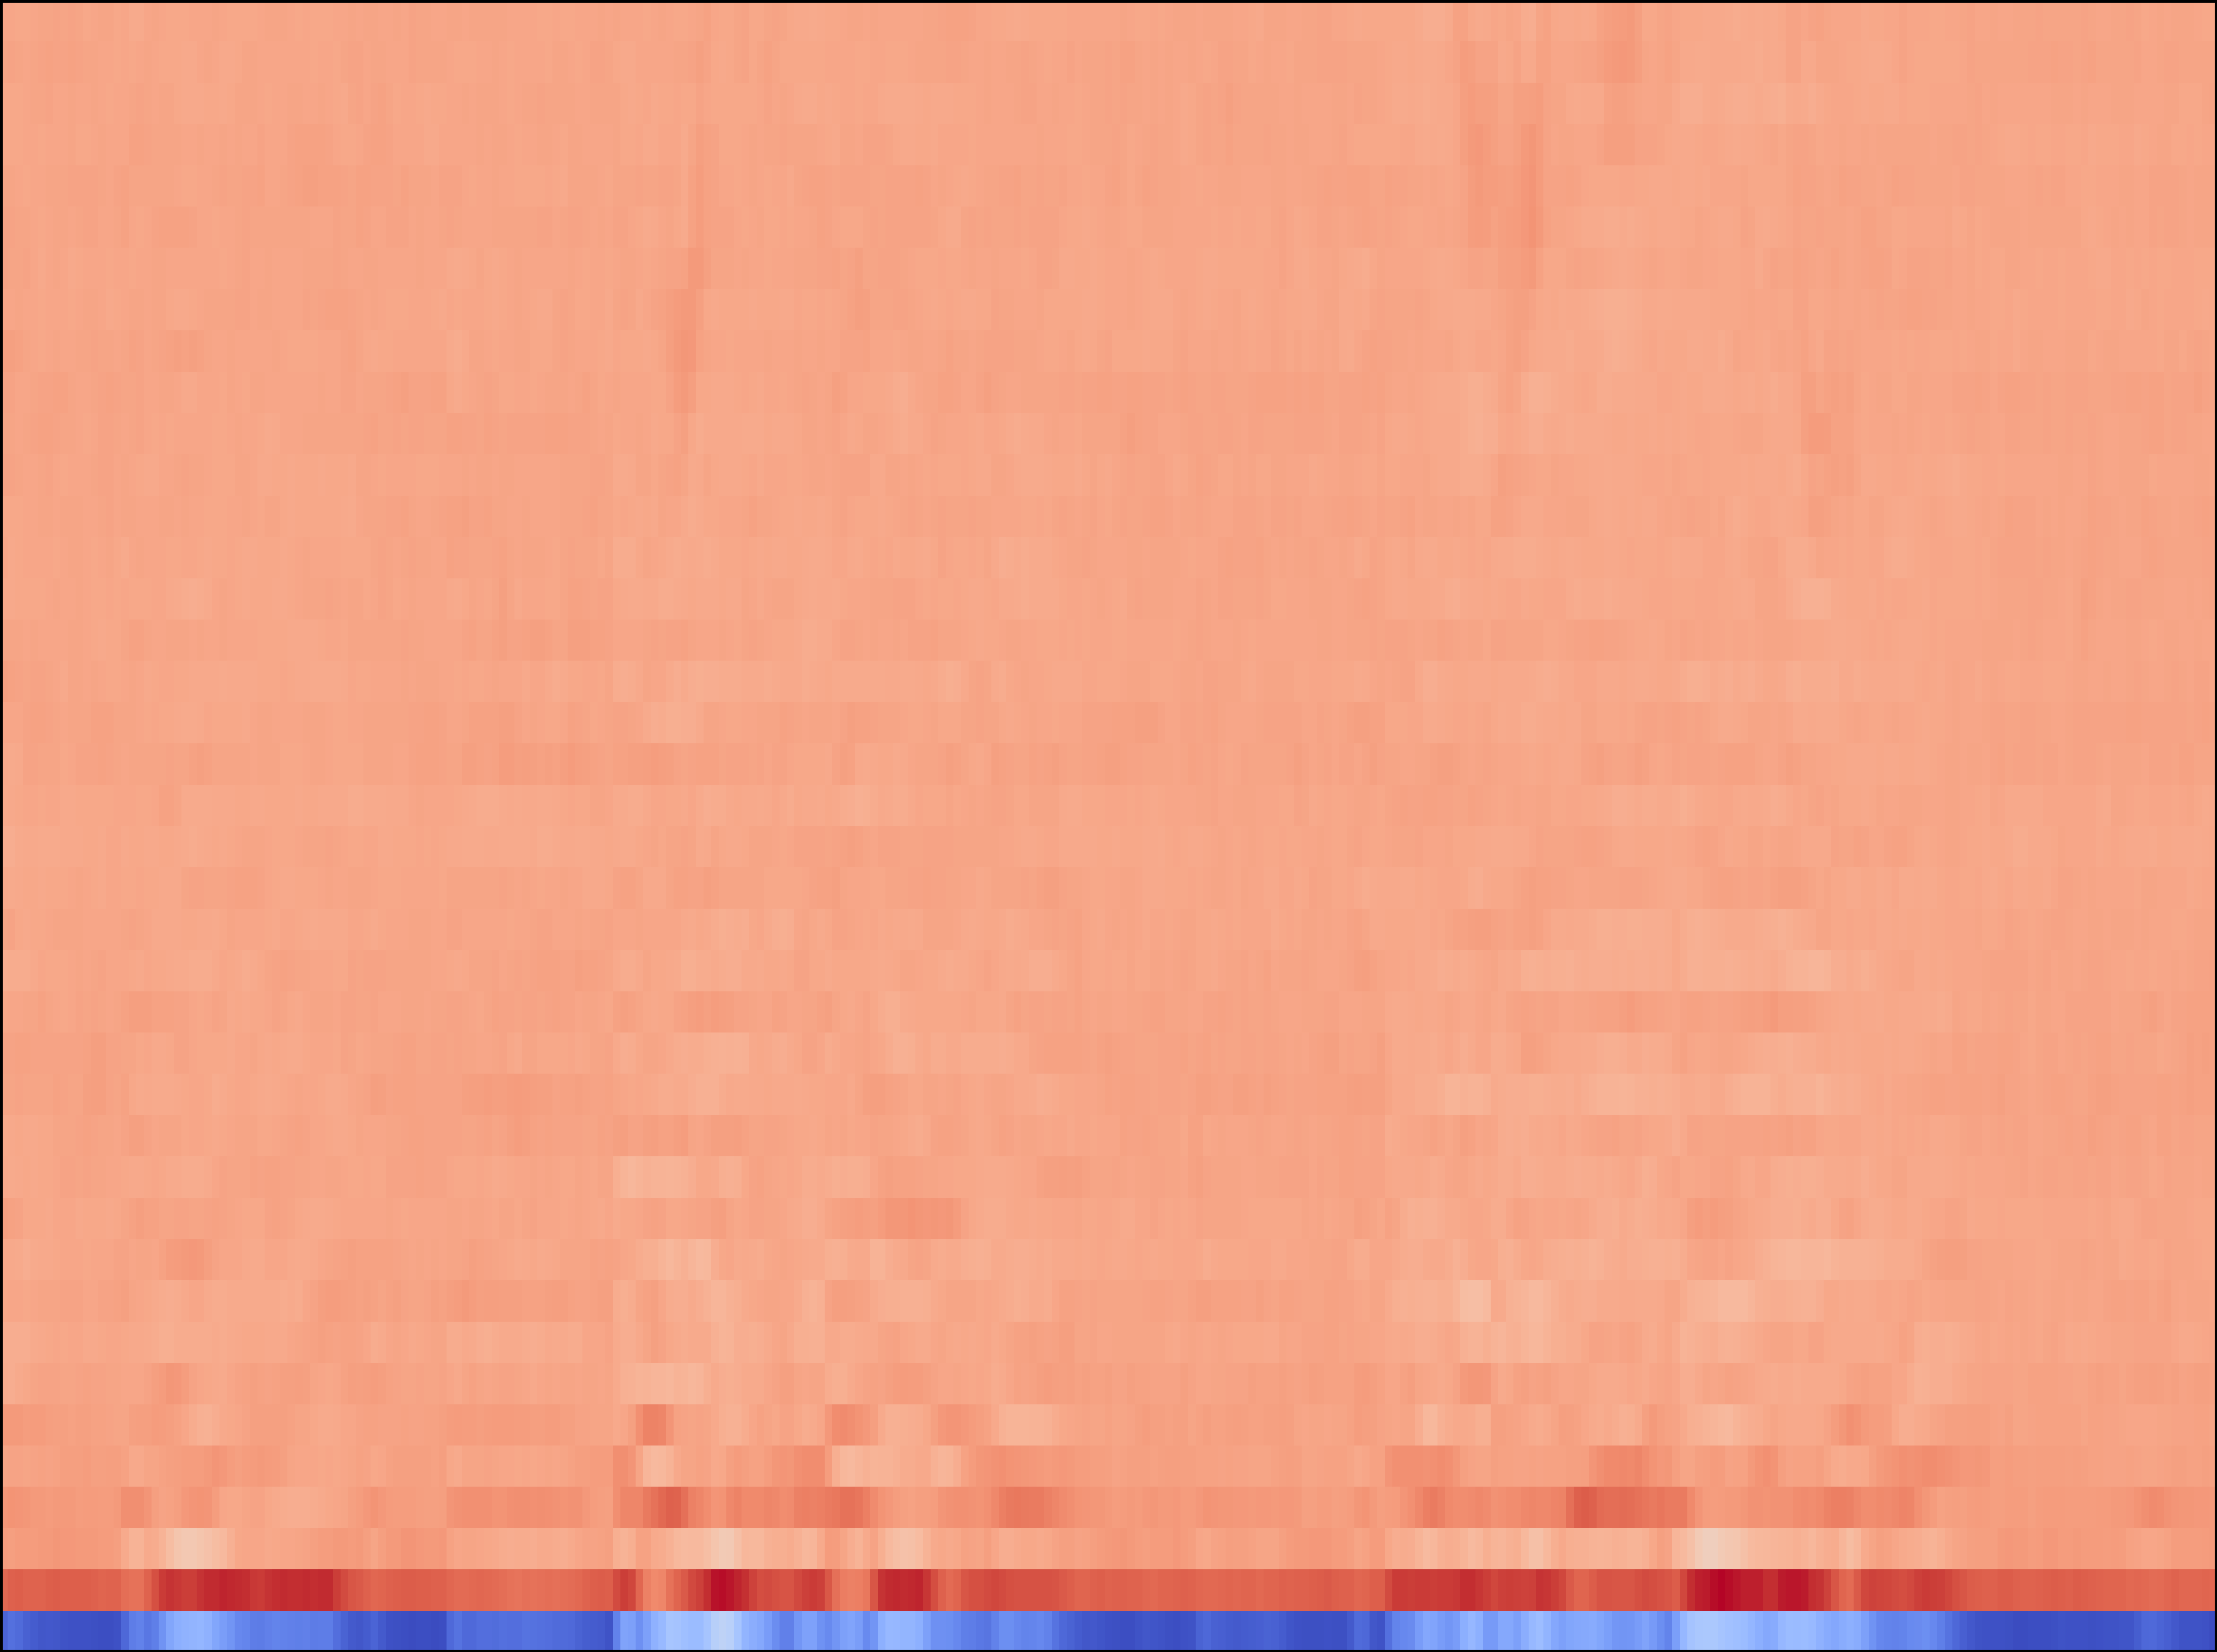

In [46]:
# print test.png
from IPython.display import Image
Image(filename='test.png')


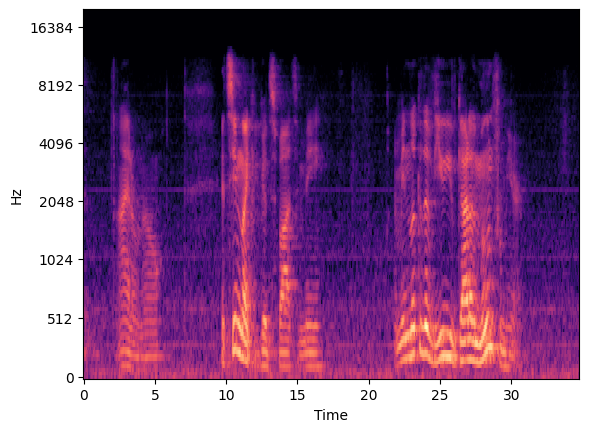

In [32]:
# Apply necessary preprocessing to generate the spectrogram representation
audio_spectogram = lb.feature.melspectrogram(y=audio, sr=sr, n_fft=1024, hop_length=100)

# Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
audio_spectogram = lb.power_to_db(audio_spectogram, ref=np.max)

# Display the spectrogram with specshow
lb.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')
path_save1 =  "lion_king.jpg"
plt.savefig(path_save1)

In [176]:
import skimage.io
# https://stackoverflow.com/questions/56719138/how-can-i-save-a-librosa-spectrogram-plot-as-a-specific-sized-image/57204349#57204349

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled


# Create a function to export the mel spectrogram as an image for the CNN training
def extract_mel_spectrogram(file_path, output_path):
    """
        This function uses librosa to extract the mel spectrogram to an image and save the image in a folder
        file_path: Path to the audio file
        output_path: Path to save the image
    """
    # Load the audio file
    audio, sr = lb.load(file_path)

    # Extract the mel spectrogram
    audio_spectogram = lb.feature.melspectrogram(y=audio, sr=sr, n_fft=1024, hop_length=100)

    # Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
    audio_spectogram = lb.power_to_db(audio_spectogram, ref=np.max)

    # Display the spectrogram with specshow
    lb.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

    # remove the axis
    plt.axis('off')
    
    # Save the figure
    plt.savefig(output_path, dpi=1000, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close('all')

In [172]:
# check which files in the img folder are not in the df
img_files = os.listdir('/Users/giliardyminicucci/Documents/University/3rdYear/Final project/1 - My Proj/Coding2/IEMOCAP/img')
# remove .png from the file names
img_files = [file.replace('.png', '') for file in img_files]

df_files = df.filename.to_list()

# get the files that are in the df but in the img folder
files_to_extract = [file for file in df_files if file not in img_files]


In [173]:
# filter dataframe to only include the files that are not in the img folder
df_extract = df[df['filename'].isin(files_to_extract)]

# filter out the emotion xxx
df_extract = df_extract[df_extract['emotion_label'] != 'xxx']

df_extract

,filename,filepath,emotion,transcription,dataset,emotion_label,gender,method,session,nr_filepath,clean_text,num_label
13,Ses04M_script02_2_F000,IEMOCAP/Session4/sentences/wav/Ses04M_script02...,neu,"Look at this, goose bumps.",IEMOCAP,neutral,F,script,4,NormalisedAudio/IEMOCAP/Ses04M_script02_2_F000...,look at this goose bump,2


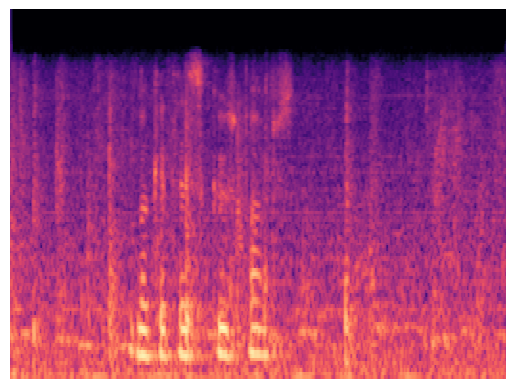

In [177]:
extract_mel_spectrogram('IEMOCAP/Session4/sentences/wav/Ses04M_script02_2/Ses04M_script02_2_F000.wav', 'IEMOCAP/img/Ses04M_script02_2_F000.png')

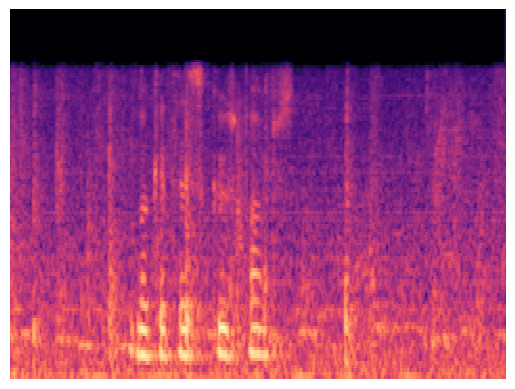

In [179]:
extract_mel_spectrogram('NormalisedAudio/IEMOCAP/Ses04M_script02_2_F000_NR.wav', 'IEMOCAP/img/Ses04M_script02_2_F000.png')

In [174]:
# add new column to the dataframe with the path to the mel spectrogram image
# df['mel_spectrogram'] = df['filepath'].apply(lambda x: x.replace('wav', 'png'))

# # iterate over the dataframe and extract the mel spectrogram
for idx, row in df_extract.iterrows():
    output_path = ('IEMOCAP/img/' + row['filename'] + '.png')
    file_path = row['nr_filepath']
    extract_mel_spectrogram(file_path, output_path)

IEMOCAP/Session4/sentences/wav/Ses04M_script02_2/Ses04M_script02_2_F000.wav


In [ ]:
# Create from imagenet style dataset in path with train and valid subfolders (or provide valid_pct)
# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.widgets import *

In [15]:
from fastai.vision.all import *
from librosa.feature import melspectrogram
from librosa.core import load

In [17]:
from fastai.data.all import *

In [18]:
class AudioItem(ItemBase):
    def __init__(self, path):
        self.path = path

class AudioList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=(".wav", ".mp3"), recursive=False):
        return cls([AudioItem(os.path.join(path, f)) for f in Path(path).glob(f"*({','.join(extensions)})") if not f.is_dir() and recursive or f.is_file()])


NameError: name 'ItemBase' is not defined

In [206]:
# create a folder for train data with each subfolder for each emotion
directories = ['IEMOCAP/train', 'IEMOCAP/validation', 'IEMOCAP/test']
emotions = df.emotion_label.unique()
print(emotions)

for directory in directories:
    os.makedirs(directory, exist_ok=True)

    for emotion in emotions:
        os.makedirs(directory + '/' + emotion, exist_ok=True)


def move_files(df, directory):
    """
        This function moves the files to the train, validation and test folders
        df: Dataframe
        directory: Directory to move the files to
    """
    # create a subfolder for each emotion in the train folder
    for idx, row in df.iterrows():
        # get the emotion label
        emotion = row['emotion_label']
        # get the file name
        filename = row['filename']
        # get the image path
        image_path = row['image_path']
        
        # move the file to the correct folder
        shutil.copy(image_path, directory + '/' + emotion + '/' + filename + '.png')

['happy' 'angry' 'neutral' 'frustrated' 'sad' 'excited']


In [211]:
# # move the files to the train folder
# # move_files(train_df, 'IEMOCAP/train')

# # move the files to the validation folder
# move_files(val_df, 'IEMOCAP/validation')

# # move the files to the test folder
# move_files(test_df, 'IEMOCAP/test')

In [227]:
# resize the images to 224x224
# resize_images('IEMOCAP/train')
resize_images('IEMOCAP/validation')
# resize_images('IEMOCAP/test')

# create a function to resize the images
def resize_images(directory):
    """
        This function resizes the images to 224x224
        directory: Directory to resize the images
    """
    # get the list of emotions
    emotions = os.listdir(directory)

    # iterate over the emotions
    for emotion in emotions:
        # get the list of files
        files = os.listdir(directory + '/' + emotion)

        # iterate over the files
        for file in files:
            # get the image path
            image_path = directory + '/' + emotion + '/' + file

            # open the image
            image = Image.open(image_path)

            # resize the image
            image = image.resize((224, 224))

            # save the image
            image.save(image_path)

In [224]:
from fastai.vision import ImageDataBunch

data = ImageDataBunch.from_folder("IEMOCAP/validation", img_size=288)


ImportError: cannot import name 'ImageDataBunch' from 'fastai.vision' (/usr/local/lib/python3.11/site-packages/fastai/vision/__init__.py)

In [219]:
train_path = 'IEMOCAP/validation'

# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# Create from imagenet style dataset in path with train and valid subfolders (or provide valid_pct)
data = ImageDataLoaders.from_folder(train_path, valid_pct=0.2, seed=42, num_workers=0)

In [1]:
# train using fastai cnn_learner with resnet34

train = cnn_learner(data, models.resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

NameError: name 'cnn_learner' is not defined

In [221]:
data.vocab

['angry', 'excited', 'frustrated', 'happy', 'neutral', 'sad']

In [222]:
# data.show_batch(figsize=(7,8))

In [223]:
train.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Invalid buffer size: 3.28 GB